# **Crie um jupyter notebook com os imports necessários e um código para gerar os gráficos referentes a base de dados de março, abril, maio, junho e dezembro (numa célula só ou em várias).**

## *1. importando as Bibliotecas*

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

## *2. separando a base de dados por meses* 

In [29]:
#lendo a base de dados
sinasc_geral = pd.read_csv('/content/SINASC_RO_2019_DEZ.csv')
sinasc_geral.DTNASC.min(), sinasc_geral.DTNASC.max()

('2019-01-01', '2019-12-31')

In [30]:
#apagando dados anteriores ao mês de março
data_lim_inc = ('2019-02-28')
sinasc_pos_mar = sinasc_geral[sinasc_geral['DTNASC'] > data_lim_inc].dropna()
sinasc_pos_mar.DTNASC.min(), sinasc_pos_mar.DTNASC.max()

('2019-03-01', '2019-12-31')

In [31]:
#apagando dados anteriores ao mês após junho
data_lim_fim = ('2019-06-31')
sinasc_mar_to_jun = sinasc_pos_mar[sinasc_pos_mar['DTNASC'] < data_lim_fim].dropna()
sinasc_mar_to_jun.DTNASC.min(), sinasc_mar_to_jun.DTNASC.max()

('2019-03-01', '2019-06-30')

In [32]:
#Gerando a Base de Dezembro
data_inc_dez = ('2019-12-01')
sinasc_dez = sinasc_geral[sinasc_geral['DTNASC'] >= data_inc_dez].dropna()
sinasc_dez.DTNASC.min(), sinasc_dez.DTNASC.max()

('2019-12-01', '2019-12-31')

In [34]:
#consolidando as bases para ter o periodo que o exercício pede: março, abril, maio, junho e dezembro.
sinasc = pd.concat([sinasc_mar_to_jun, sinasc_dez])
sinasc.DTNASC.min(), sinasc.DTNASC.max()

('2019-03-01', '2019-12-31')

## *3. Criando as pastas para guardar os arquivos de gráficos*

In [43]:
pwd

'/content'

In [44]:
os.makedirs('./content/'+max_data)

# *4. Criando os gráficos*

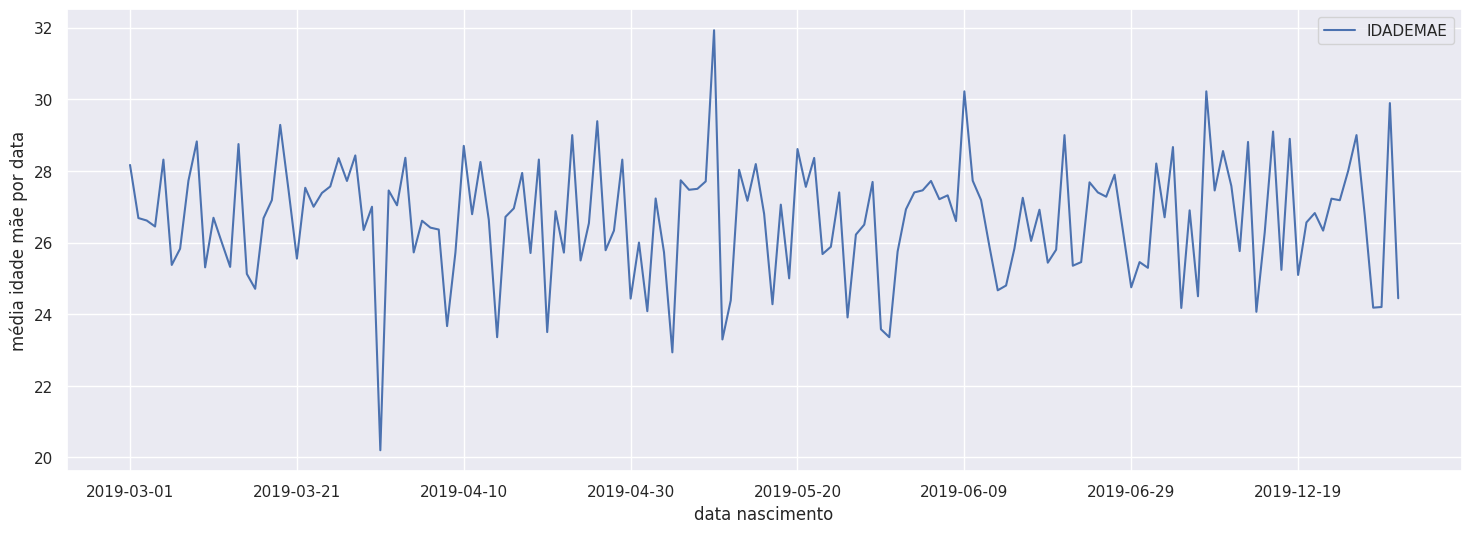

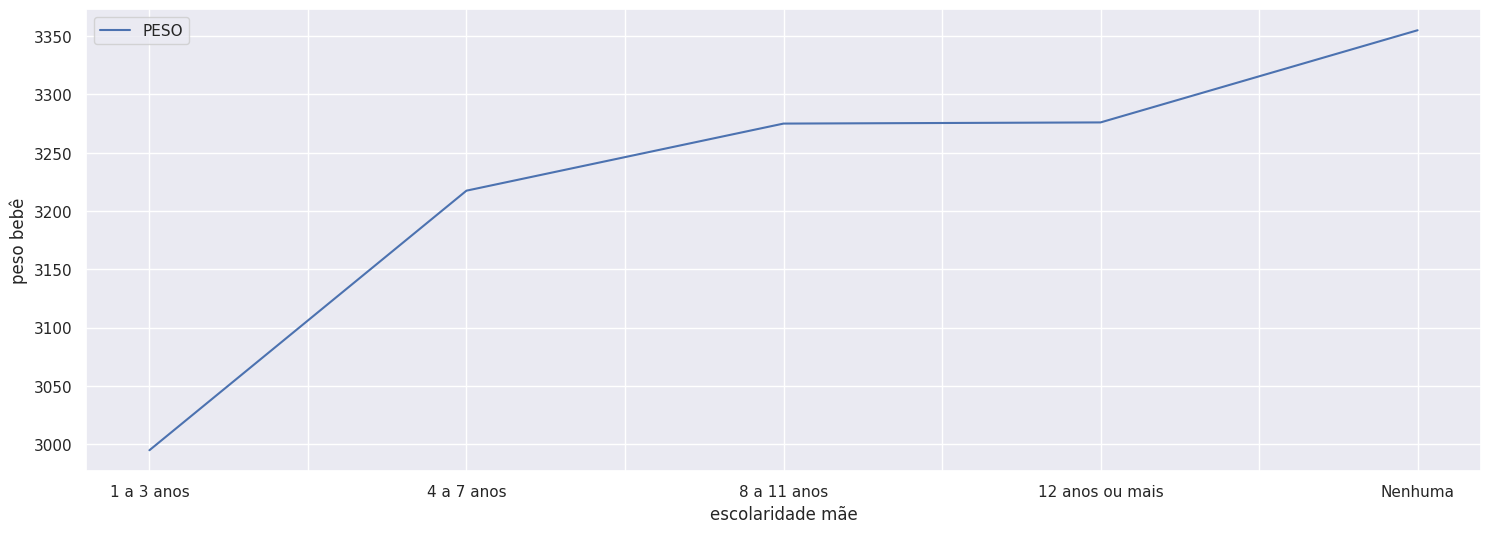

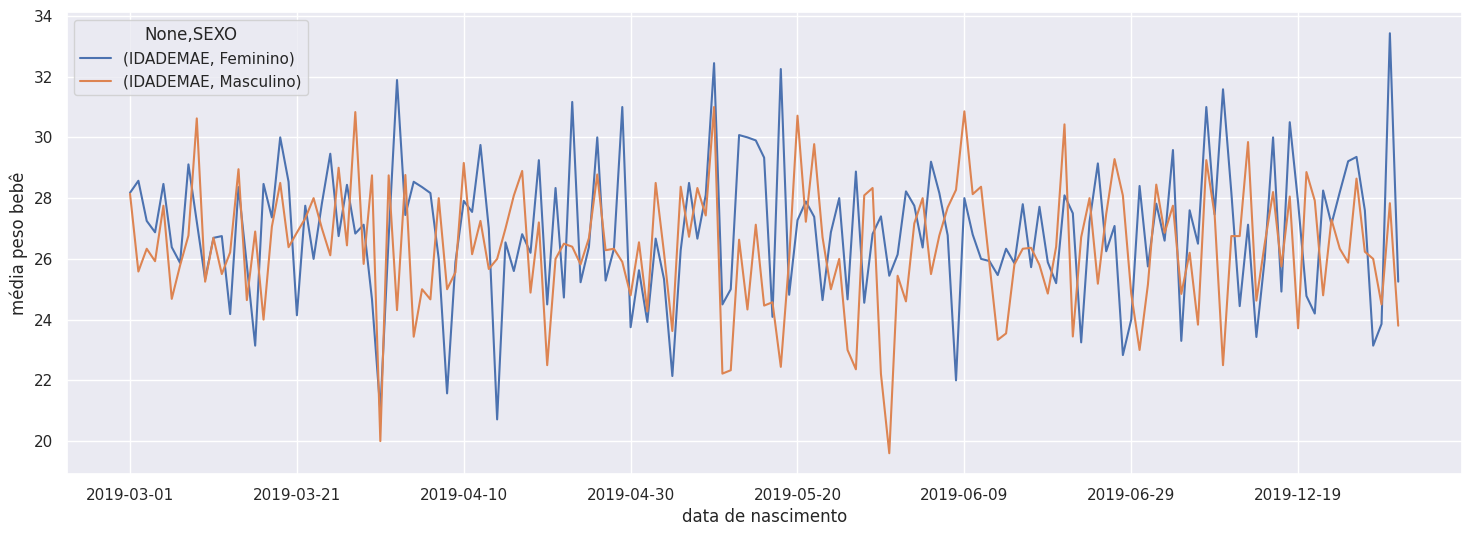

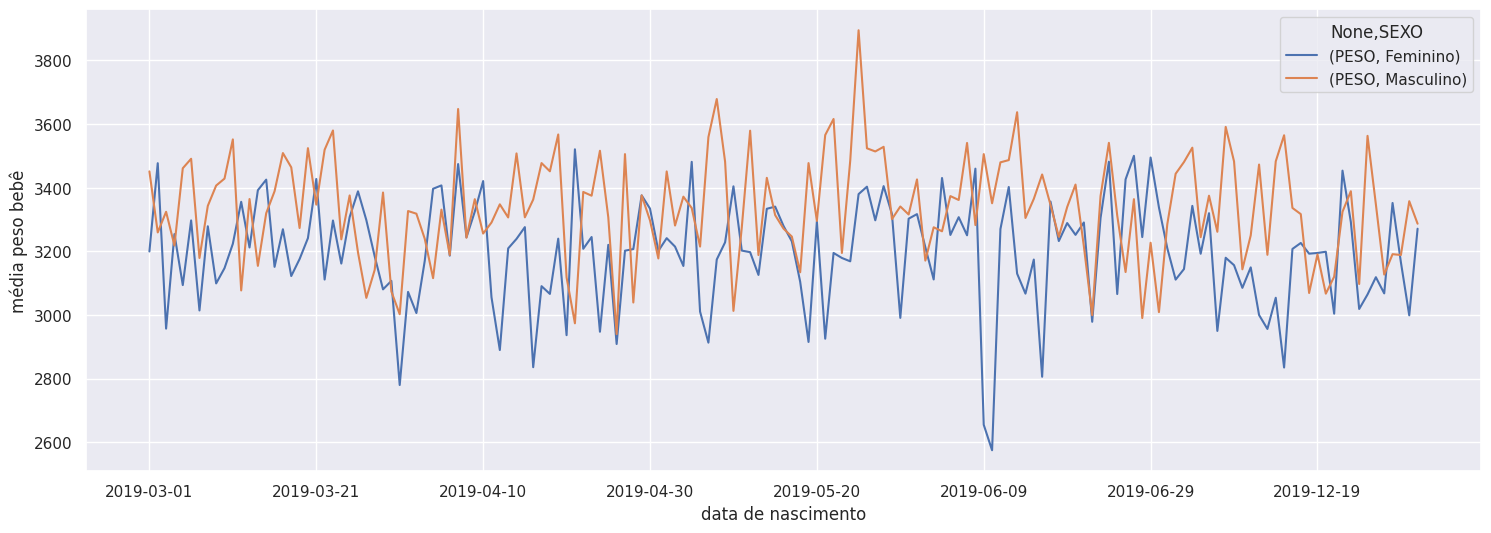

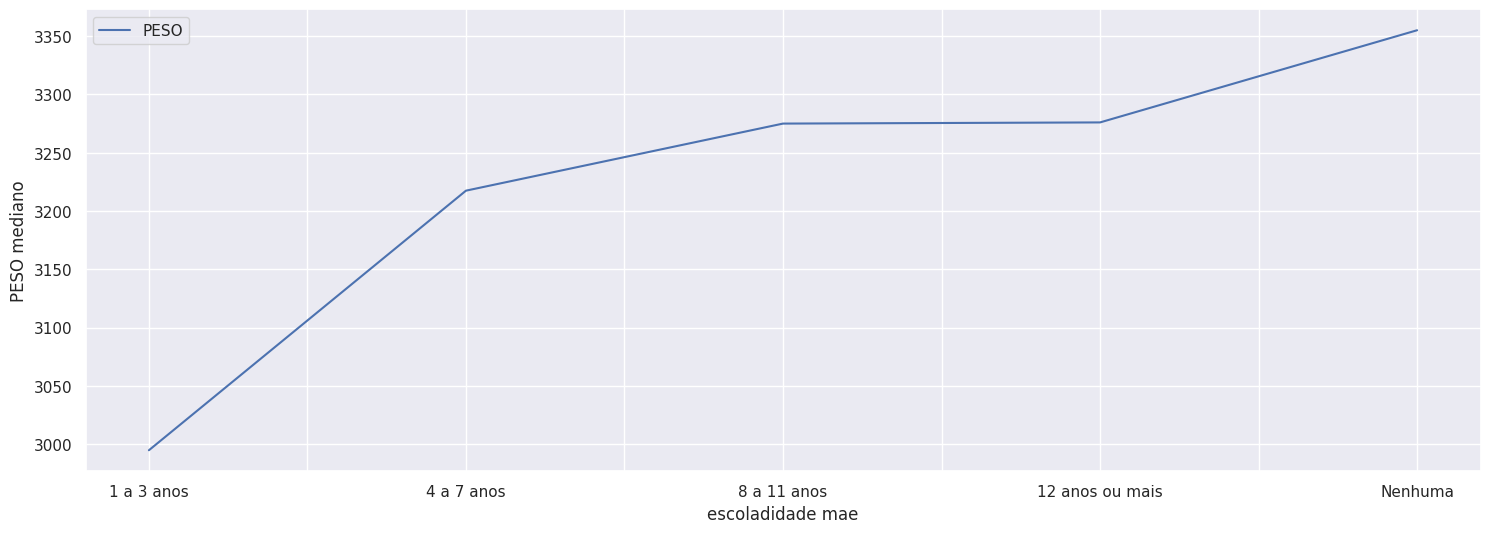

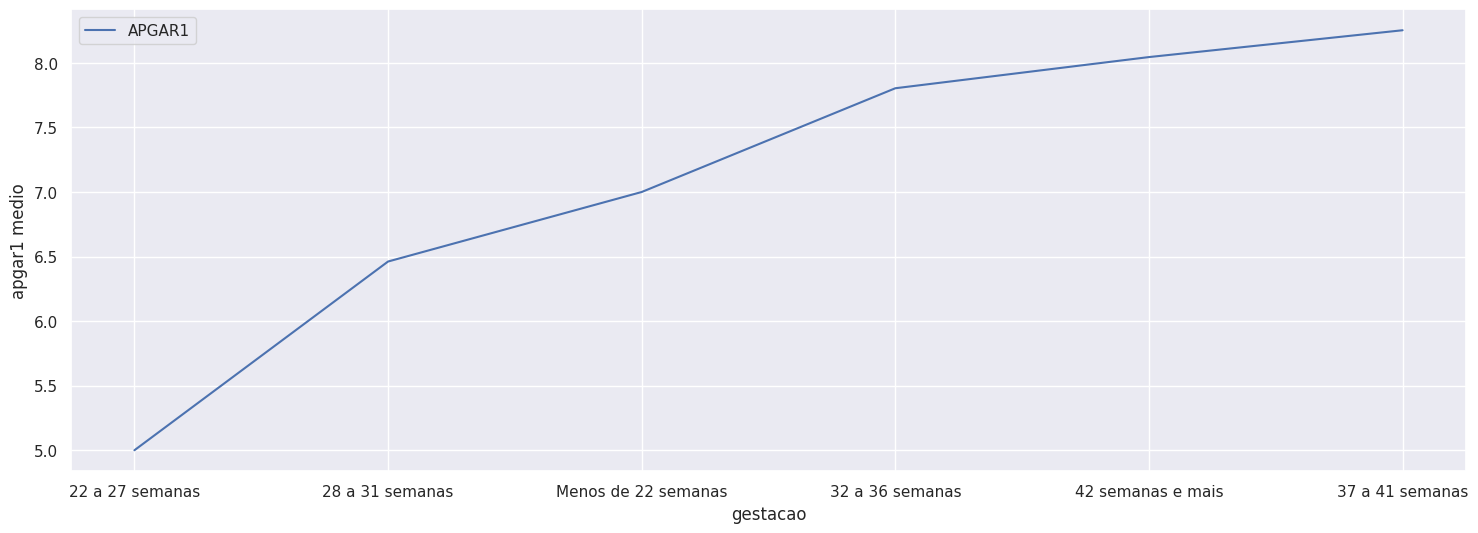

In [45]:
sns.set()

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
  if opcao == 'nada':
    pd.pivot_table(df, values= value, index= index, aggfunc= func).plot(figsize=[18, 6])
  elif opcao == 'unstack':
    pd.pivot_table(df, values= value, index= index, aggfunc= func).unstack().plot(figsize=[18, 6])
  elif opcao == 'sort':
    pd.pivot_table(df, values= value, index= index, aggfunc= func).sort_values(value).plot(figsize=[18, 6])
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)    
  return None

plota_pivot_table(sinasc, 'IDADEMAE', 'DTNASC', 'mean', 'média idade mãe por data', 'data nascimento')
plt.savefig('./content/'+max_data+'/media idade mae por data.png')

plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', 'peso bebê', 'escolaridade mãe', 'sort')
plt.savefig('./content/'+max_data+'/peso por escolaridade mae.png')

plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'média peso bebê', 'data de nascimento', 'unstack')
plt.savefig('./content/'+max_data+'/media idade da mae por sexo.png')

plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'média peso bebê', 'data de nascimento', 'unstack')
plt.savefig('./content/'+max_data+'/media peso do bebe por sexo.png')

plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', 'PESO mediano', 'escoladidade mae', 'sort')
plt.savefig('./content/'+max_data+'/peso mediano por escolaridade da mae.png')

plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio', 'gestacao', 'sort')
plt.savefig('./content/'+max_data+'/media apgar1 por gestacao.png')

# **Como que você poderia fazer para deixar isso mais automatizado? Descreva na última célula do jupyter notebook o que ajudaria na hora de gerar novos gráficos pros meses/anos seguintes.**

Eu de fato, achei bem automatizado, ainda mais se comparar com os meus trabalhos, pois faço algo parecido com isso e gero gráfico por gráfico. Tirando essa alegria de aprender a automatizar um pouco, entendo que, tratando-se de  código, já está bem enxuto.
Penso que um passo além, seria automatizar o *import* da própria base de dados, ou seja, toda vez que recebermos ela, ela já vir direto pro código gerar os gráficos, como se fosse um report diário, e evidentemente, apagar os gráficos antigos, tendo sempre o mais atual na pasta de gráficos.